In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score , r2_score
from sklearn.model_selection import KFold , cross_val_score, GridSearchCV , train_test_split
from sklearn.base import BaseEstimator
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
# boston 데이터세트의 target 배열은 주택가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
bostonDF.shape

(506, 14)

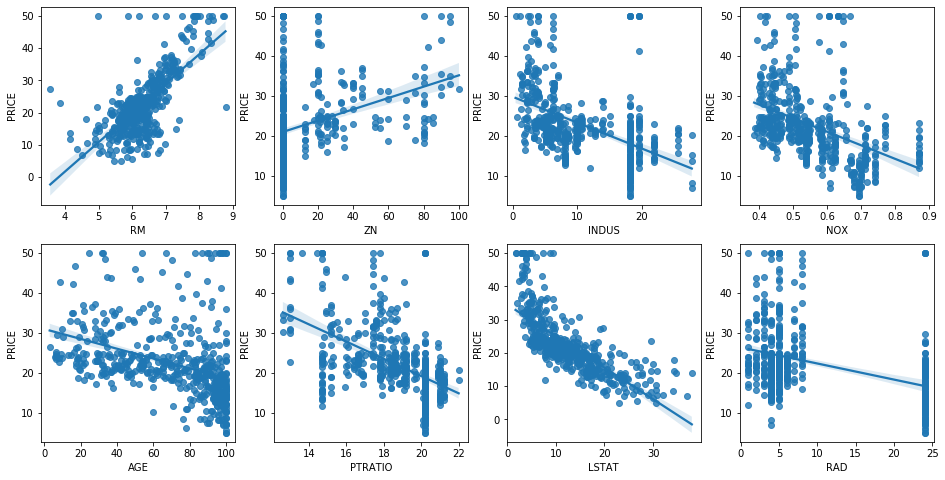

In [5]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs 는 4*2개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (16,8),ncols = 4, nrows = 2)
lm_feature = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(lm_feature):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y= 'PRICE',data = bostonDF, ax = axs[row][col])

In [6]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [8]:
X = bostonDF['RM']
Y = bostonDF['PRICE']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 156)

- 모델을 불러와 객체 생성

In [10]:
sim_lr = LinearRegression()

- 모델 학습하기

In [11]:
sim_lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 결과 예측하기

In [12]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

- 결과 확인하기

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5392348356231995

- 계수 w, 절편 b

In [14]:
sim_lr.coef_,sim_lr.intercept_

(array([8.78948225]), -32.40723965886481)

- 도출한 회귀식 : PRICE = 8.79 * RM - 32.4

- 산점도와 회귀선 그리기

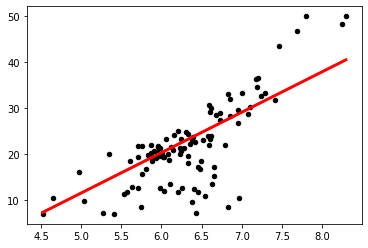

In [15]:
plt.scatter(X_test,y_test,s = 20,c='black')
line_X = np.linspace(np.min(X_test),np.max(X_test),10)
line_y = sim_lr.predict(line_X.reshape(-1,1))
plt.plot(line_X,line_y,c='r',lw = 3)
plt.show()

In [16]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b

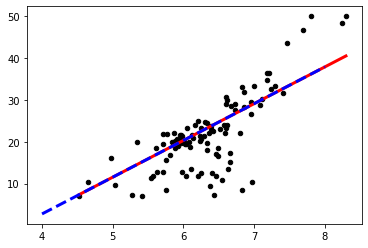

In [17]:
plt.scatter(X_test,y_test,s = 20,c='black')
plt.plot(line_X,line_y,c='r',lw = 3)
plt.plot(xs,ys,c='b',lw=3,ls='--')
plt.show()

In [18]:
Y = bostonDF['LSTAT']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 19)
sim_lr = LinearRegression()
sim_lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

In [20]:
r2_score(y_test,y_pred)

0.3026161606706066

In [21]:
sim_lr.coef_,sim_lr.intercept_

(array([-6.56961023]), 53.99852520760162)

In [22]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b

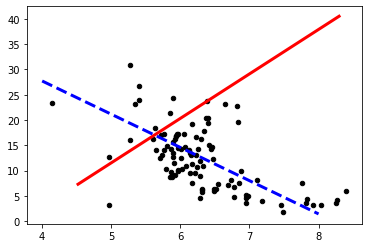

In [23]:
plt.scatter(X_test,y_test,s = 20,c='black')
plt.plot(line_X,line_y,c='r',lw = 3)
plt.plot(xs,ys,c='b',lw=3,ls='--')
plt.show()

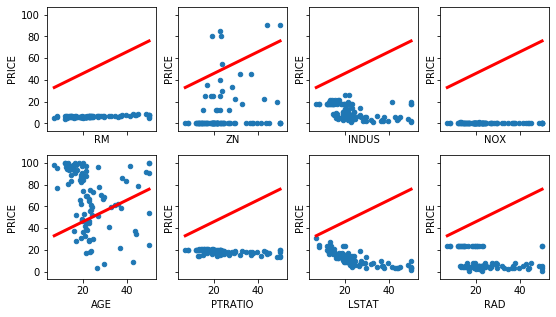

In [39]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize = (9,5),sharex = True,sharey= True)

lm_feature = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(lm_feature):
    row = int(i/4)
    col = i%4
    Y = bostonDF[feature]
    X = bostonDF['PRICE']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                        test_size = 0.2,random_state = 19)
    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1,1),y_train)

    
    ax= axs[row][col]
    ax.scatter(X_test,y_test,s = 20)
    ax.plot(line_X,line_y,c='r',lw = 3)
    ax.set_xlabel(feature)
    ax.set_ylabel('PRICE')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
def single_regression(x_train,x_test,y_train,y_test):
    slr = LinearRegression()
    slr.fit(x_train.values.reshape(-1,1),y_train)
    y_pred = slr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
    return rmse,slr.coef_[0],slr.intercept_

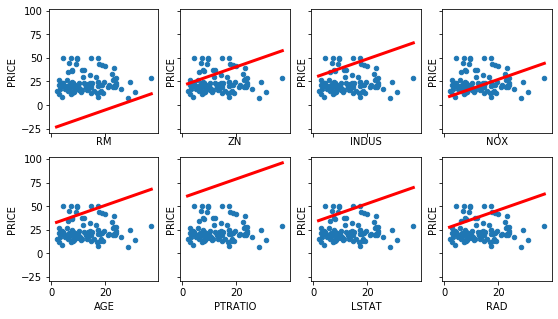

In [42]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize = (9,5),sharex = True,sharey= True)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for index,feature in enumerate(lm_features):
    X = bostonDF[feature]
    x_train,x_test,y_train,y_test = \
    train_test_split(X,boston.target, test_size = 0.2 ,random_state = 19)
    
    rmse,weight,bias = single_regression(x_train,x_test,y_train,y_test)
    
    row = index // 4
    col = index % 4
    
    line_X = np.array([np.min(X_test),np.max(X_test)])
    line_y = weight +line_X + bias
    
    ax= axs[row][col]
    ax.scatter(X_test,y_test,s = 20)
    ax.plot(line_X,line_y,c='r',lw = 3)
    ax.set_xlabel(feature)
    ax.set_ylabel('PRICE')

In [86]:
X = bostonDF['LSTAT']
Y = bostonDF['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 19)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)
y_pred = lr.predict(X_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

### Decision Tree Regressior

In [87]:
from sklearn.tree import DecisionTreeRegressor
dt_refr = DecisionTreeRegressor(max_depth = 5)

In [88]:
X = bostonDF['LSTAT']
Y = bostonDF['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 19)
dtr = DecisionTreeRegressor()
dtr.fit(X_train.values.reshape(-1,1),y_train)
y_pred = dtr.predict(X_test.values.reshape(-1,1))
rmse_dtr = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

In [89]:
### Support Vector Machine Regressor

In [90]:
from sklearn.svm import SVR
svm_regr = SVR()

In [91]:
X = bostonDF['LSTAT']
Y = bostonDF['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 19)
svr = SVR()
svr.fit(X_train.values.reshape(-1,1),y_train)
y_pred = svr.predict(X_test.values.reshape(-1,1))
rmse_svr = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

In [92]:
print(rmse_lr,rmse_dtr,rmse_svr)

7.09 7.06 7.03
